# Q3. Project - Numerical Recipes!

#### Propose a project to do while at The Data Incubator. 

We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.

#### Propose a project that uses a large, publicly accessible dataset. 

Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.

#### Propose a project.

TODO: Insert project description

* Motivation
* Data source discussion
* Analysis approach
* Introductory EDA
* Convince viable AND interesting

#### Link to public description of data source. 
e.g. [http://blog.thedataincubator.com/tag/data-sources/]

#### Link to 1st plot. 

*You are highly encouraged to use a Heroku apps domain for your hosting.* 

e.g. [http://example.herokuapp.com/]

#### Link to 2nd plot.
e.g. [http://example.herokuapp.com/]

#### How much data did you analyze (in MB)?* 

1234

#### How did you obtain your dataset? (Please check all that apply.)

I downloaded a dataset available online.
I used a provided API.
I scraped data from a webpage.
Other (please explain).

#### We want to know your communication style. 

Record a video of yourself giving a high-level proposal of your project to a **non-technical person**. The video should be no longer than 1 minute and should be at a **higher level than the previous explanation**.

Record a video of yourself and upload it to YouTube (and not another video hosting service). **Be sure to make the video unlisted (but not private!)** so people without the link cannot find it on Google (go here, click "Edit" on your video, select unlisted from the privacy dropdown menu, and save your changes). You can use either your webcam or a smartphone.

Once complete, please provide the embed URL of the video. To find this URL (NOT the entire iframe tag), on the video's normal watch page, you can click Share → Embed, and take the link from inside the 'src' attribute of the tag. It looks something like this: [https://www.youtube.com/embed/y9tX5whl2U]

#### Please provide the EMBED URL to your video

e.g. [https://www.youtube.com/embed/y9tX5whl2U]


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## What's the Problem?

![Allergic boy!](./IMG_0951.JPG "ShowMyImage")


# What's the data set(s)?

Recipe data is available via an API by subscription, or possibly via a complementary Hakathon-style license, from the Yummly [https://www.yummly.com]. For this prototype, I am using an extract of Yummly data that has been provided to Kaggle [https://www.kaggle.com/c/whats-cooking] for one of their introductory competitions.

### Prototype data set

This JSON-formatted dataset contains the recipe id, type of cuisine and list of ingredients for each recipe (which is a list of variable length).

In [47]:
data_source_URL = 'https://www.kaggle.com/c/whats-cooking/data'

data_file = 'Kaggle_WhatsCooking_train.json'       # Named train.json on Kaggle site

In [48]:
!ls *.json

Kaggle_WhatsCooking_train.json


In [9]:
recipes = pd.read_json('Kaggle_WhatsCooking_train.json')

In [10]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
recipes.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [14]:
recipes.cuisine.nunique()

20

In [21]:
ingredients = recipes.ingredients.apply(pd.Series).stack().value_counts()

In [31]:
len(ingredients)

6714

In [36]:
allergy_profile = ['butter', 'milk', 'peanuts', 'pecan', 'nuts', 'fish']

vegan_profile = ['beef', 'chicken', 'pork', ...]

muslim_profile = ['pork', 'halal', etc...]

vegetarian = []

paleo = []

intolerant = []

medical = []

personal_pref = []


# Check on text matching - is it partial of whole word (would think whole word)

In [37]:
ingredients[allergy_profile] / len(ingredients)

butter     0.722073
milk       0.337057
peanuts    0.060471
pecan           NaN
nuts       0.005213
fish       0.013554
dtype: float64

In [40]:
recipes.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
# Find all recipes that DON'T contain allergens and then group by cuisine

In [60]:
recipes.ingredients[1]

['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [132]:
def allergens_in_ingredients(allergens, ingredients, n_allergens):
    inter = set(allergens).intersection(set(ingredients))
    if len(inter) > n_allergens:
        return 1
    else:
        return 0

In [135]:
allergens_in_ingredients(allergy_profile, recipes.ingredients[1], 1)

0

In [122]:
recipes.ingredients[1]

['plain flour',
 'ground pepper',
 'salt',
 'tomatoes',
 'ground black pepper',
 'thyme',
 'eggs',
 'green tomatoes',
 'yellow corn meal',
 'milk',
 'vegetable oil']

In [144]:
recipes['has_most1_allergen'] = recipes.ingredients.apply(lambda ingred: allergens_in_ingredients(allergy_profile, ingred, 1))

In [142]:
recipes['has_any_allergen'] = recipes.ingredients.apply(lambda ingred: allergens_in_ingredients(allergy_profile, ingred, 0))

In [145]:
recipes.head(10)

,cuisine,id,ingredients,has_any_allergen,n_ingredients,has_most1_allergen
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,9,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",1,11,0
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",1,12,0
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,4,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",1,20,1
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",1,12,1
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",0,13,0
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",0,10,0
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",0,13,0
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",0,6,0


In [65]:
tmp = recipes.groupby('cuisine')['has_any_allergen'].value_counts()

In [66]:
tmp

cuisine       has_any_allergen
brazilian     0                    372
              1                     95
british       0                    456
              1                    348
cajun_creole  0                   1158
              1                    388
chinese       0                   2512
              1                    161
filipino      0                    673
              1                     82
french        0                   2003
              1                    643
greek         0                   1059
              1                    116
indian        0                   2555
              1                    448
irish         0                    397
              1                    270
italian       0                   6618
              1                   1220
jamaican      0                    442
              1                     84
japanese      0                   1301
              1                    122
korean        0                  

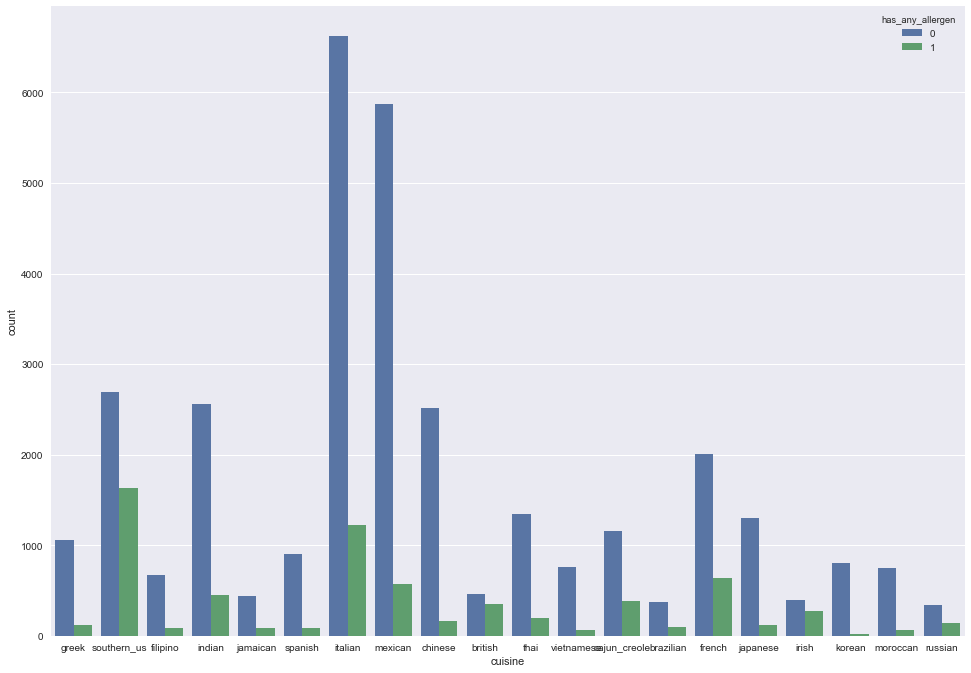

In [104]:
factor = 1.4
a4_dims = (11.7*factor, 8.27*factor)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='cuisine', hue='has_any_allergen', data=recipes)

In [146]:
tmp1 = recipes.groupby('cuisine')['has_most1_allergen'].value_counts()

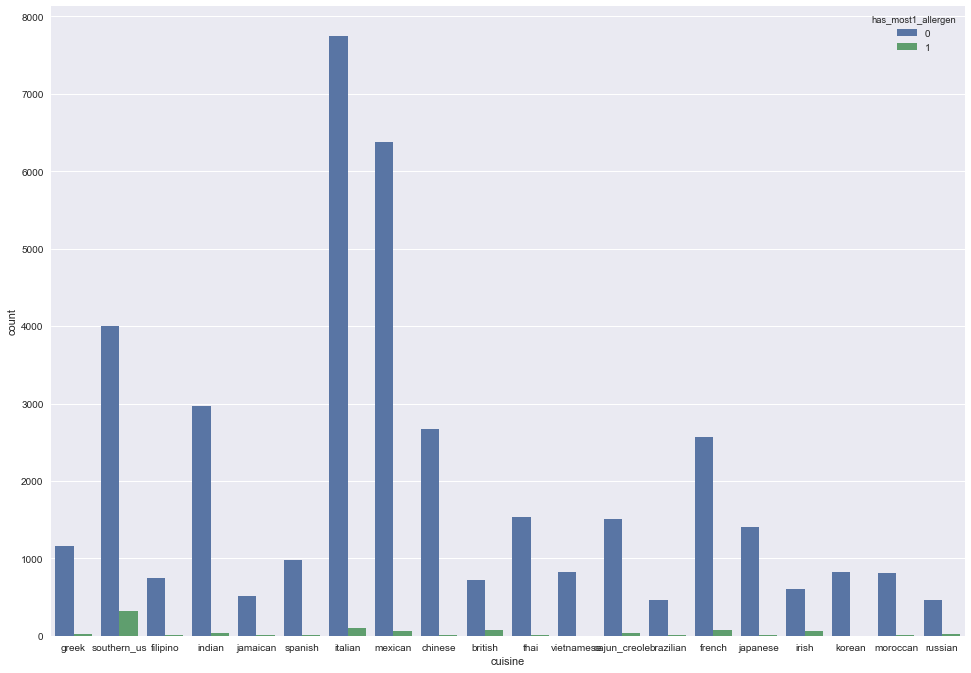

In [148]:
factor = 1.4
a4_dims = (11.7*factor, 8.27*factor)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='cuisine', hue='has_most1_allergen', data=recipes)

#### So by relaxing on 1 allergen ingredient only in a recipe it allows [in this example] for many more recipes to be 'back on the table'.

In [147]:
recipes['n_ingredients'] = recipes.ingredients.apply(lambda ingred : len(ingred))

In [85]:
recipes.head(5)

,cuisine,id,ingredients,has_any_allergen,n_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",1,11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",1,12
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",1,20


(0, 30)

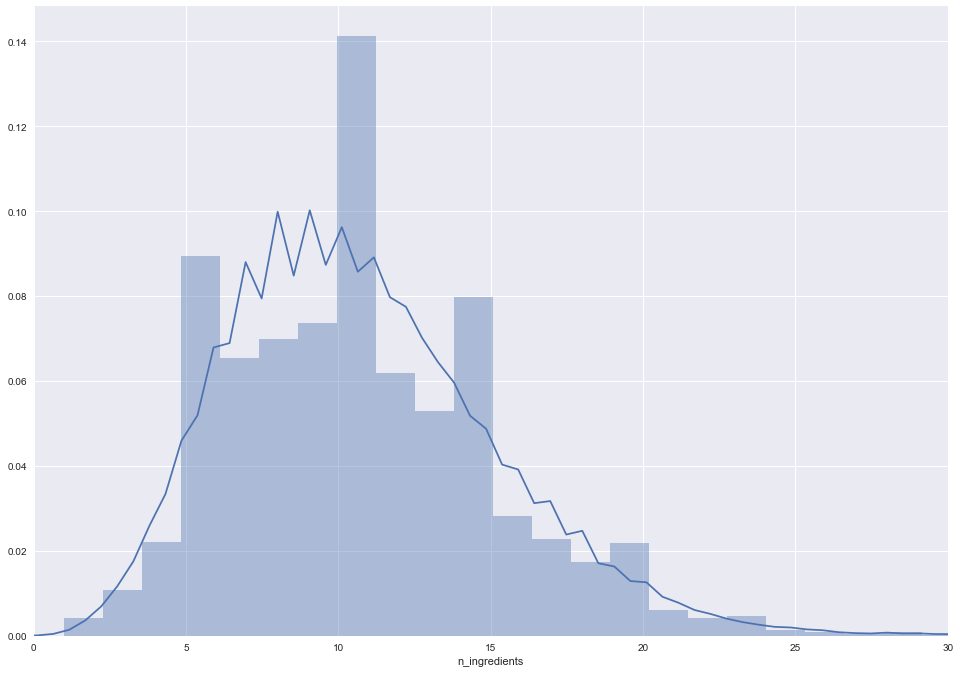

In [155]:
factor = 1.4
a4_dims = (11.7*factor, 8.27*factor)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(recipes.n_ingredients)
ax.set_xlim(0,30)

In [153]:
(recipes.n_ingredients > 30).value_counts()

False    39734
True        40
Name: n_ingredients, dtype: int64

In [154]:
recipes.n_ingredients.max()

65

#### Comment: very long right tail for number of ingredients?! Looks like problem with a few recipes

In [86]:
recipes.n_ingredients.mean()

10.76771257605471

In [151]:
recipes.n_ingredients.median()

10.0

In [87]:
recipes.n_ingredients.std()

4.428977570208113

In [94]:
recipes[recipes.n_ingredients > 50]

,cuisine,id,ingredients,has_any_allergen,n_ingredients
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",1,65
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",1,52
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",1,59


In [100]:
for ingredient in recipes[recipes.id == 13430].ingredients:
    print(ingredient)

['marshmallows', 'fresh corn', 'cheddar cheese', 'shredded coconut', 'water', 'honey', 'baking soda', 'dijon mustard', 'sweet potatoes', 'chicken breasts', 'vegetable oil', 'salt', 'condensed milk', 'candy', 'canola oil', 'eggs', 'brown sugar', 'glutinous rice', 'white onion', 'dashi', 'whole wheat flour', 'oat flour', 'flour', 'boneless skinless chicken breasts', 'fresh thyme leaves', 'sprinkles', 'grated lemon zest', 'ham', 'white sugar', 'avocado', 'chili flakes', 'coconut oil', 'skim milk', 'pepper', 'kale', 'parmesan cheese', 'unsalted butter', 'tapioca starch', 'baking powder', 'parsley', 'vanilla extract', 'cream cheese', 'coconut milk', 'chocolate chips', 'low sodium soy sauce', 'powdered sugar', 'sugar', 'muffin', 'milk', 'olive oil', 'bananas', 'large eggs', 'green onions', 'swiss cheese', 'butter', 'all-purpose flour', 'dark brown sugar', 'panko breadcrumbs', 'low-fat milk']


#### Is this really a recipe? 59 ingredients? Maybe some issue in collating the data?

In [157]:
recipes.groupby('n_ingredients').head(1)

,cuisine,id,ingredients,has_any_allergen,n_ingredients,has_most1_allergen
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",0,9,0
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",1,11,0
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",1,12,0
3,indian,22213,"[water, vegetable oil, wheat, salt]",0,4,0
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",1,20,1
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",0,13,0
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",0,10,0
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",0,6,0
11,chinese,45887,"[low sodium soy sauce, fresh ginger, dry musta...",0,15,0
13,mexican,41995,"[ground cinnamon, fresh cilantro, chili powder...",0,17,0


In [91]:
recipes.groupby('cuisine')['n_ingredients'].value_counts()

cuisine     n_ingredients
brazilian   4                57
            5                50
            6                50
            11               34
            7                27
            9                26
            3                24
            12               23
            14               23
            8                22
            13               22
            15               22
            10               21
            16               21
            17               15
            18               10
            19                5
            2                 3
            21                2
            22                2
            25                2
            20                1
            23                1
            24                1
            29                1
            36                1
            59                1
british     7                85
            10               81
            8                74
              

### Related work:

* https://cseweb.ucsd.edu/~jmcauley/cse255/reports/fa15/039.pdf




### Acknowledgements

Thanks to my supportive family!

Background video music: "Weird Al" Yankovic - "Eat It"  https://itunes.apple.com/au/artist/weird-al-yankovic/id1855044